In [1]:
###Import the stats packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from collections import Counter
import json

In [2]:
#Generate empty dataframe
dataframe = pd.DataFrame()

#open the json file
#normalise the loaded json (there are multiple levels of nesting)
#then add this normalised data as a new row of the dataframe

f = open('kfold.json',)
data = json.load(f)
norm_data = pd.json_normalize(data)
dataframe = pd.concat([dataframe, norm_data])
dataframe['fold'] = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']

#Drop the labels that are of no interest here
dataframe = dataframe.drop(labels = ['token_acc',  'token_p',  'token_r',  'token_f'], axis=1)
#Add a new column for the mean
dataframe.loc['Mean'] = dataframe.mean()
dataframe['fold']['Mean'] = 'Mean'
print(dataframe.loc['Mean'])
#print(dataframe)

spans_sc_p                       0.969545
spans_sc_r                       0.931613
spans_sc_f                       0.950154
speed                         1075.653197
spans_sc_per_type.NO_GVL.p       0.939137
spans_sc_per_type.NO_GVL.r       0.877972
spans_sc_per_type.NO_GVL.f        0.90687
spans_sc_per_type.HVL.p          0.962918
spans_sc_per_type.HVL.r          0.938859
spans_sc_per_type.HVL.f          0.950708
spans_sc_per_type.GVL.p           0.98321
spans_sc_per_type.GVL.r           0.96358
spans_sc_per_type.GVL.f          0.973157
spans_sc_per_type.NO_HVL.p       0.988469
spans_sc_per_type.NO_HVL.r       0.962866
spans_sc_per_type.NO_HVL.f       0.975404
spans_sc_per_type.RVL.p          0.975377
spans_sc_per_type.RVL.r          0.834945
spans_sc_per_type.RVL.f          0.898974
spans_sc_per_type.NO_RVL.p       0.962346
spans_sc_per_type.NO_RVL.r       0.966825
spans_sc_per_type.NO_RVL.f       0.964559
fold                                 Mean
Name: Mean, dtype: object


/tmp/ipykernel_149047/2321155990.py:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.loc['Mean'] = dataframe.mean()
/tmp/ipykernel_149047/2321155990.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fold']['Mean'] = 'Mean'


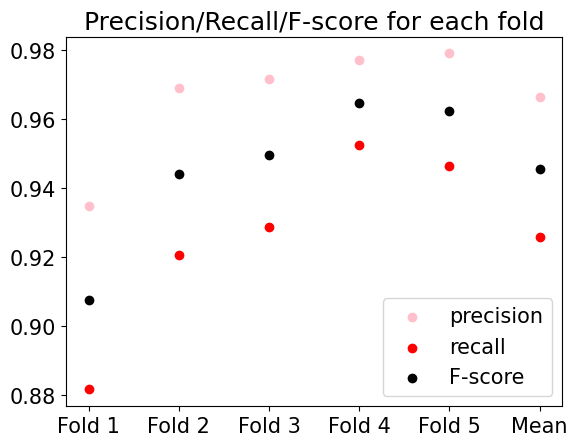

In [4]:
#Plot charts for overall p/r/f for each threshold
categories = ["GVL","NO_GVL","RVL","NO_RVL","HVL","NO_HVL"]

plt.rcParams.update({'font.size': 15})

plt.scatter(dataframe['fold'], dataframe['spans_sc_p'], color='pink')
plt.scatter(dataframe['fold'], dataframe['spans_sc_r'], color='red')
plt.scatter(dataframe['fold'], dataframe['spans_sc_f'], color='black')
plt.legend(['precision', 'recall', 'F-score'])
plt.title('Precision/Recall/F-score for each fold')
plt.show()

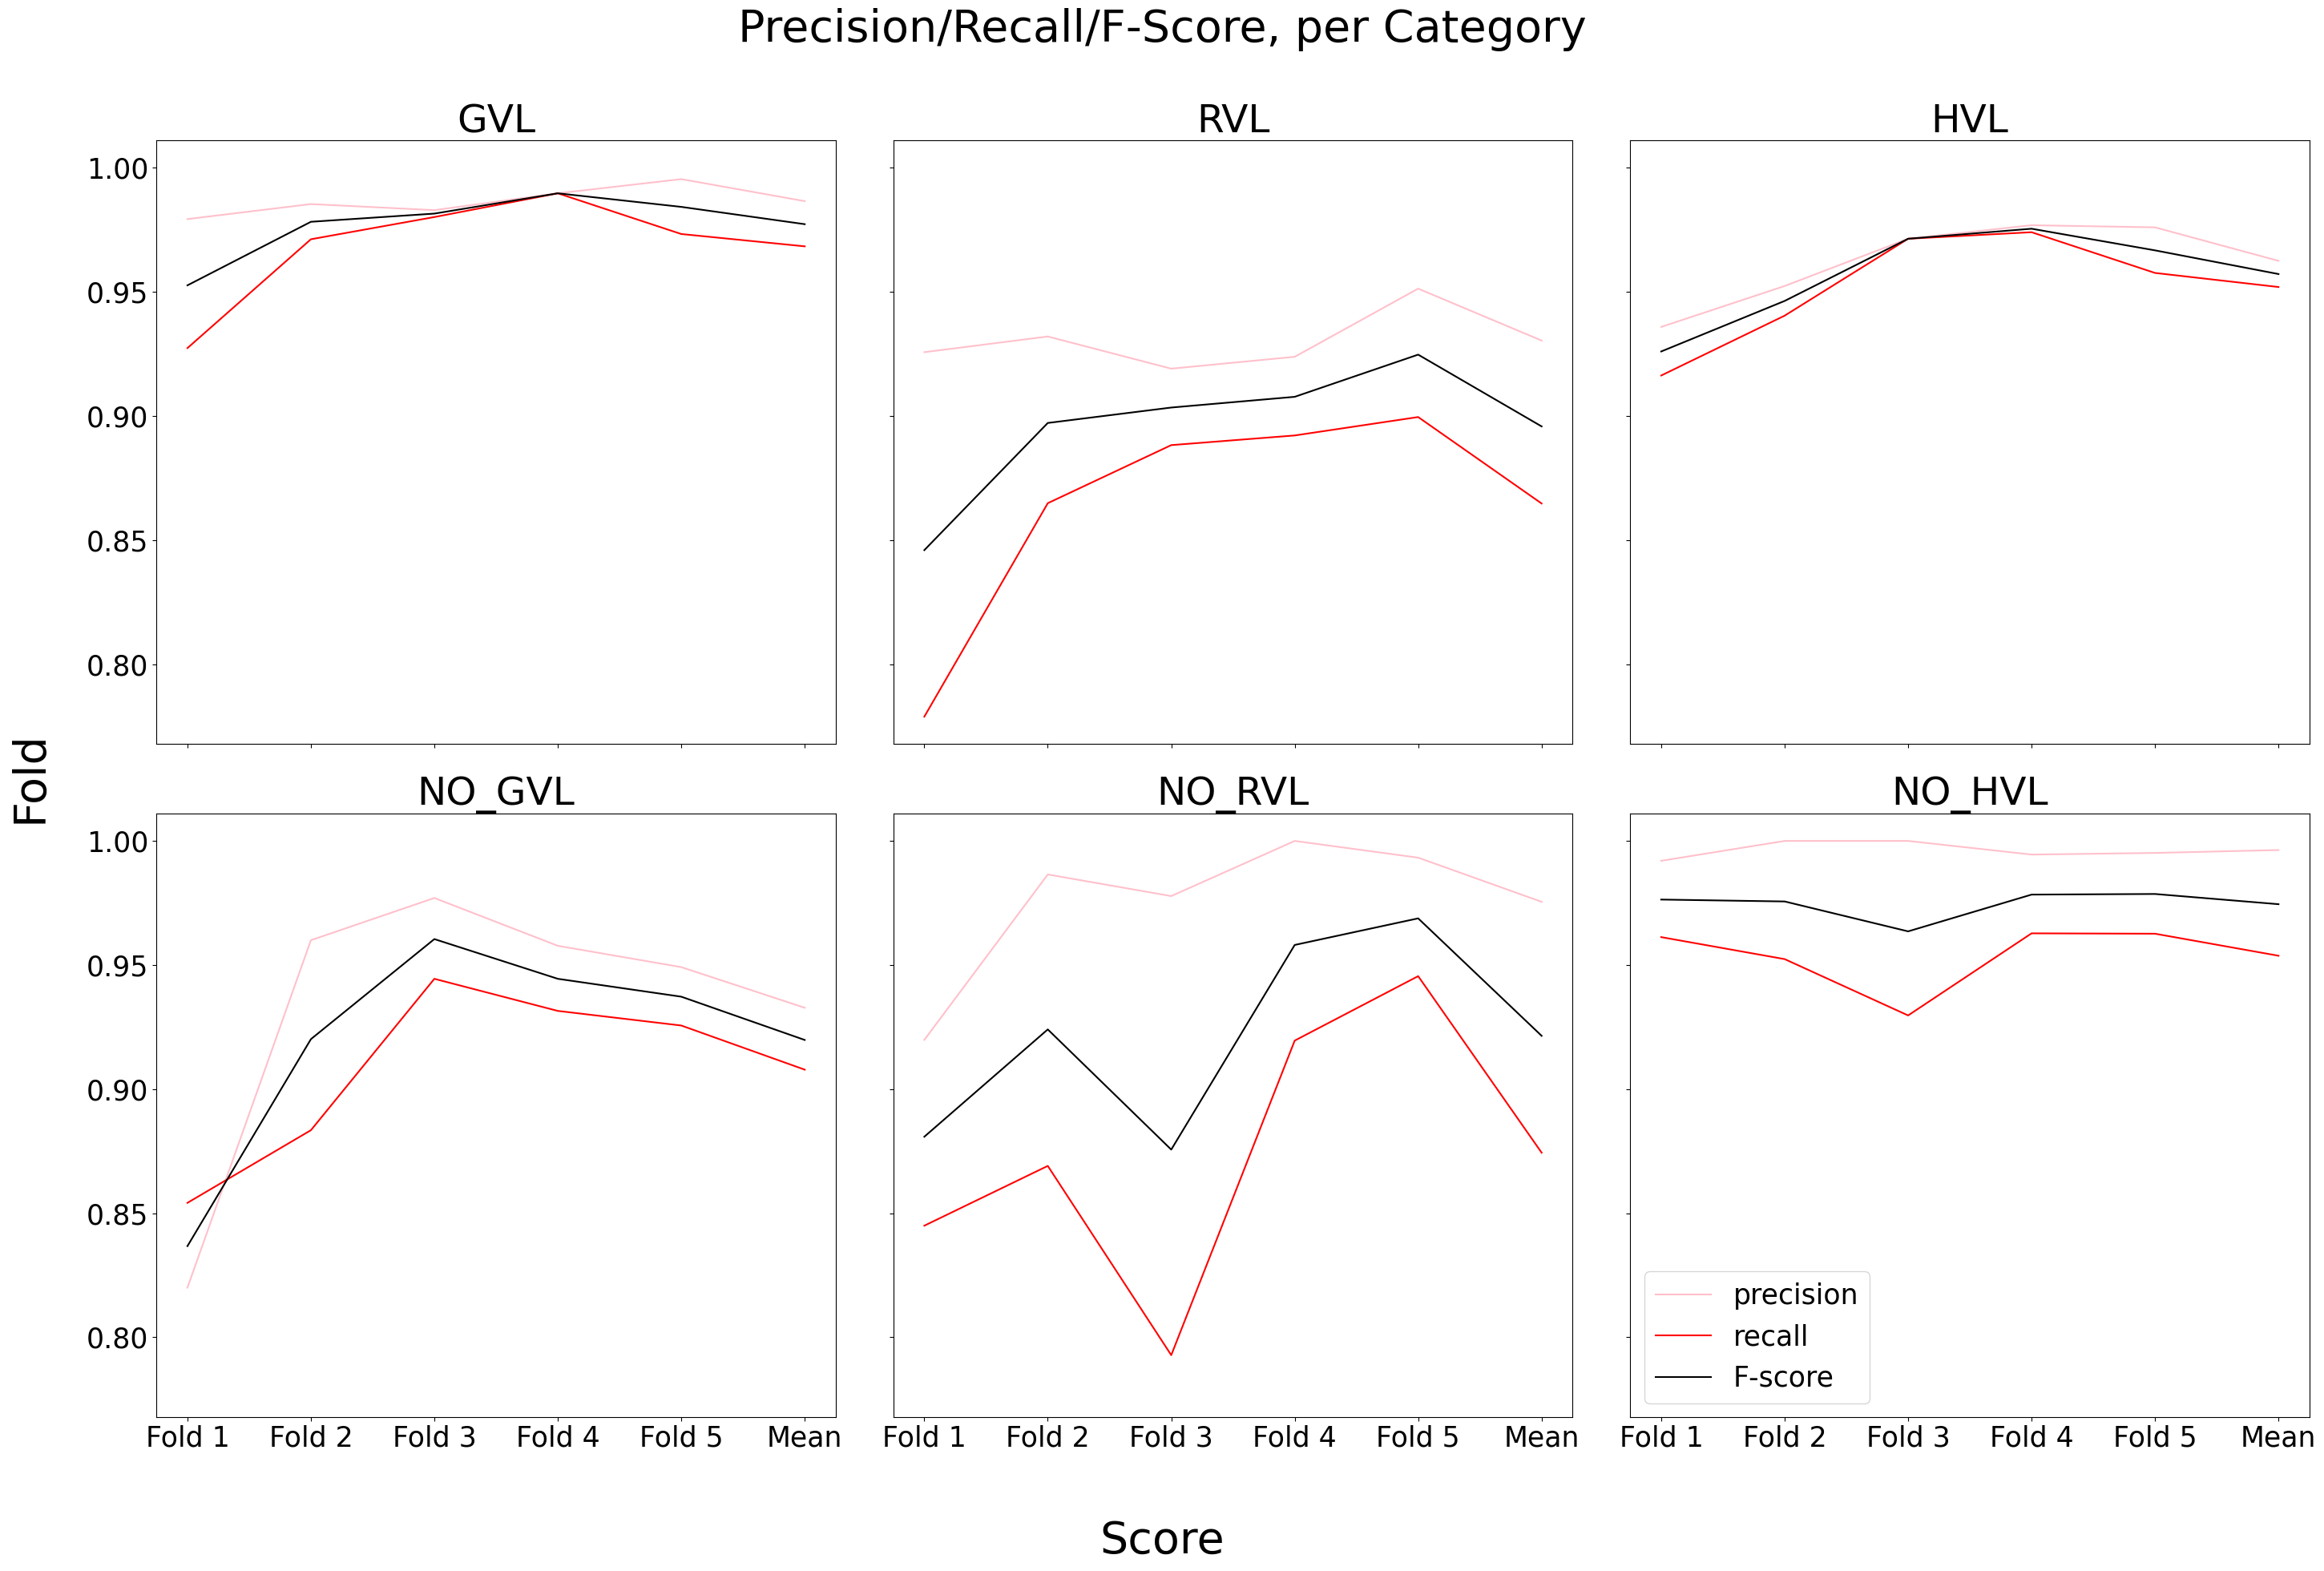

In [5]:
# Grid of charts
# Initialize the grid with 2 rows and 3 columns
plt.rcParams.update({'font.size': 25})
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, subplot_kw = dict(polar = False), figsize=(30,20))

#Set font sizes
big_text = 40
small_text = 35

#Set title and the shared axis labels 
fig.suptitle('Precision/Recall/F-Score, per Category', fontsize=big_text)
fig.supxlabel('Score', fontsize=big_text)
fig.supylabel('Fold', fontsize=big_text)


#Generate the subplots
axs[0, 0].set_title('GVL', fontsize=small_text)
axs[0, 0].plot(dataframe['fold'], dataframe['spans_sc_per_type.GVL.p'], color='pink')
axs[0, 0].plot(dataframe['fold'], dataframe['spans_sc_per_type.GVL.r'], color='red')
axs[0, 0].plot(dataframe['fold'], dataframe['spans_sc_per_type.GVL.f'], color='black')


axs[1, 0].set_title('NO_GVL', fontsize=small_text)
axs[1, 0].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_GVL.p'], color='pink')
axs[1, 0].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_GVL.r'], color='red')
axs[1, 0].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_GVL.f'], color='black')


axs[0, 1].set_title('RVL', fontsize=small_text)
axs[0, 1].plot(dataframe['fold'], dataframe['spans_sc_per_type.RVL.p'], color='pink')
axs[0, 1].plot(dataframe['fold'], dataframe['spans_sc_per_type.RVL.r'], color='red')
axs[0, 1].plot(dataframe['fold'], dataframe['spans_sc_per_type.RVL.f'], color='black')

axs[1, 1].set_title('NO_RVL', fontsize=small_text)
axs[1, 1].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_RVL.p'], color='pink')
axs[1, 1].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_RVL.r'], color='red')
axs[1, 1].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_RVL.f'], color='black')

axs[0, 2].set_title('HVL', fontsize=small_text)
axs[0, 2].plot(dataframe['fold'], dataframe['spans_sc_per_type.HVL.p'], color='pink')
axs[0, 2].plot(dataframe['fold'], dataframe['spans_sc_per_type.HVL.r'], color='red')
axs[0, 2].plot(dataframe['fold'], dataframe['spans_sc_per_type.HVL.f'], color='black')

axs[1, 2].set_title('NO_HVL', fontsize=small_text)
axs[1, 2].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_HVL.p'], color='pink')
axs[1, 2].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_HVL.r'], color='red')
axs[1, 2].plot(dataframe['fold'], dataframe['spans_sc_per_type.NO_HVL.f'], color='black')

#Tighten the layout and use set padding level
fig.tight_layout(pad=1.5, h_pad=1, w_pad=1)

#Show the chart
plt.legend(['precision', 'recall', 'F-score'])
plt.show()
